In [1]:
# Let's start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("heart_disease.csv")  # read the data
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data= data.drop(columns = ['Unnamed: 0'])

In [9]:
data.shape

(303, 14)

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Preprocessing 

### 1. Data Cleaning

### 2. EDA (Analysis)

### 3. Finding and Treating Outliers (if any)

### 4. Feature Selection for model building

### 5. Data Standardization

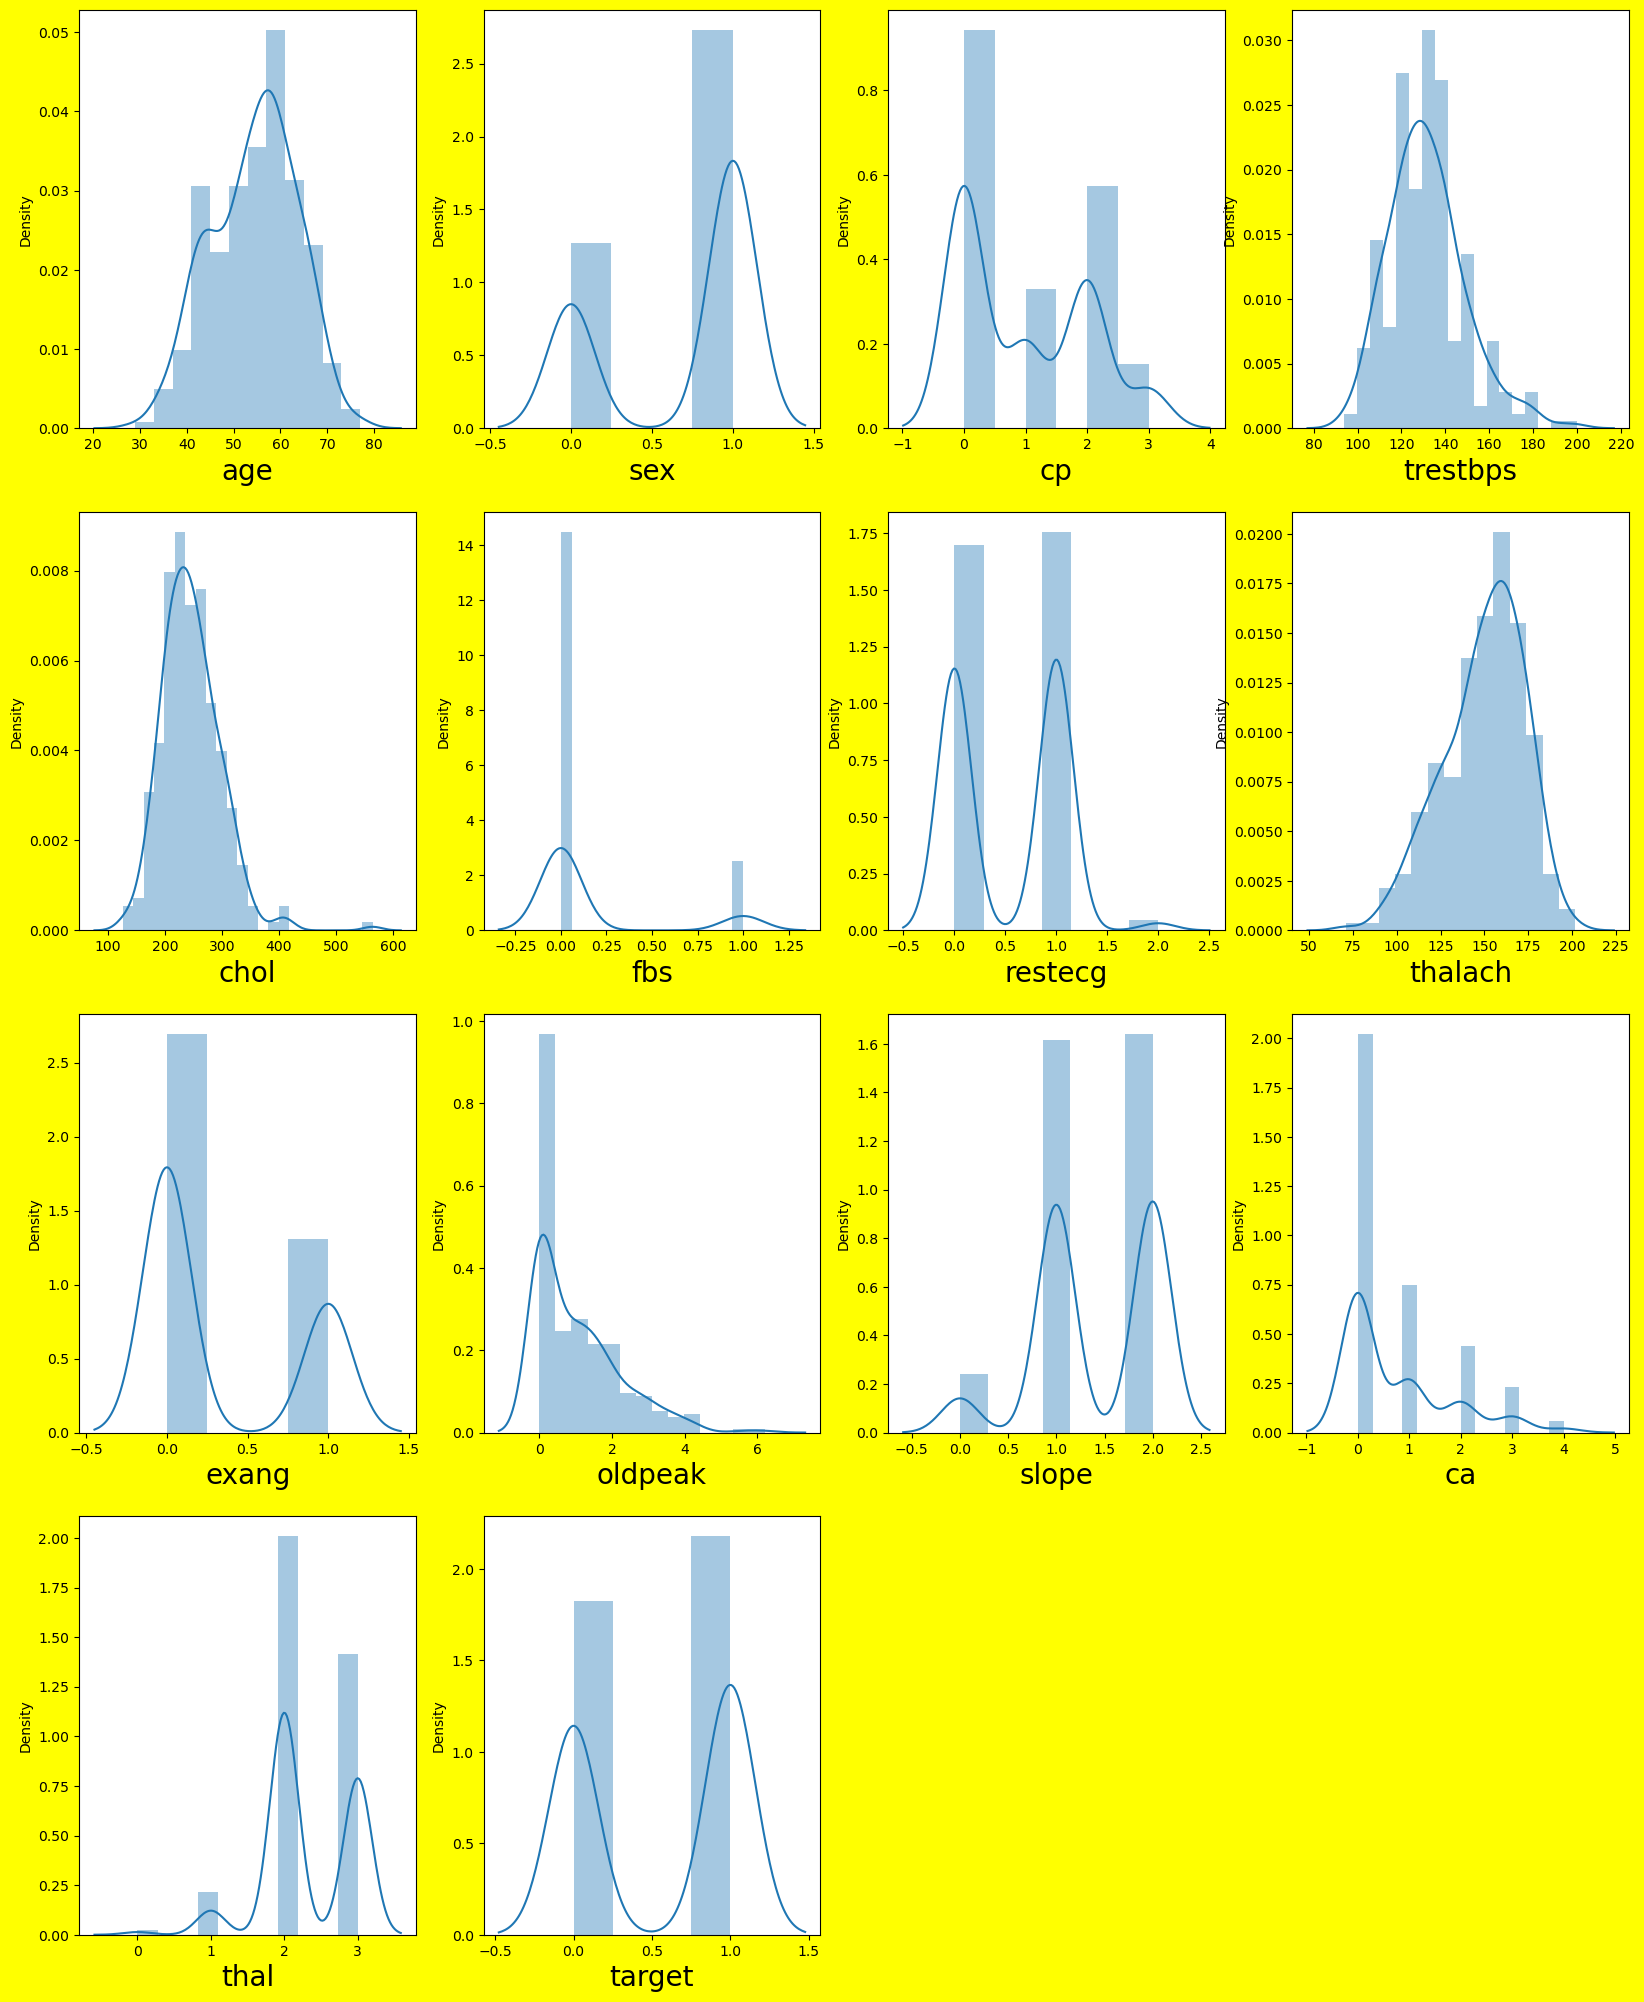

In [12]:
# Let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+= 1   
plt.show()

In [13]:
df_features = data.drop('target', axis=1)

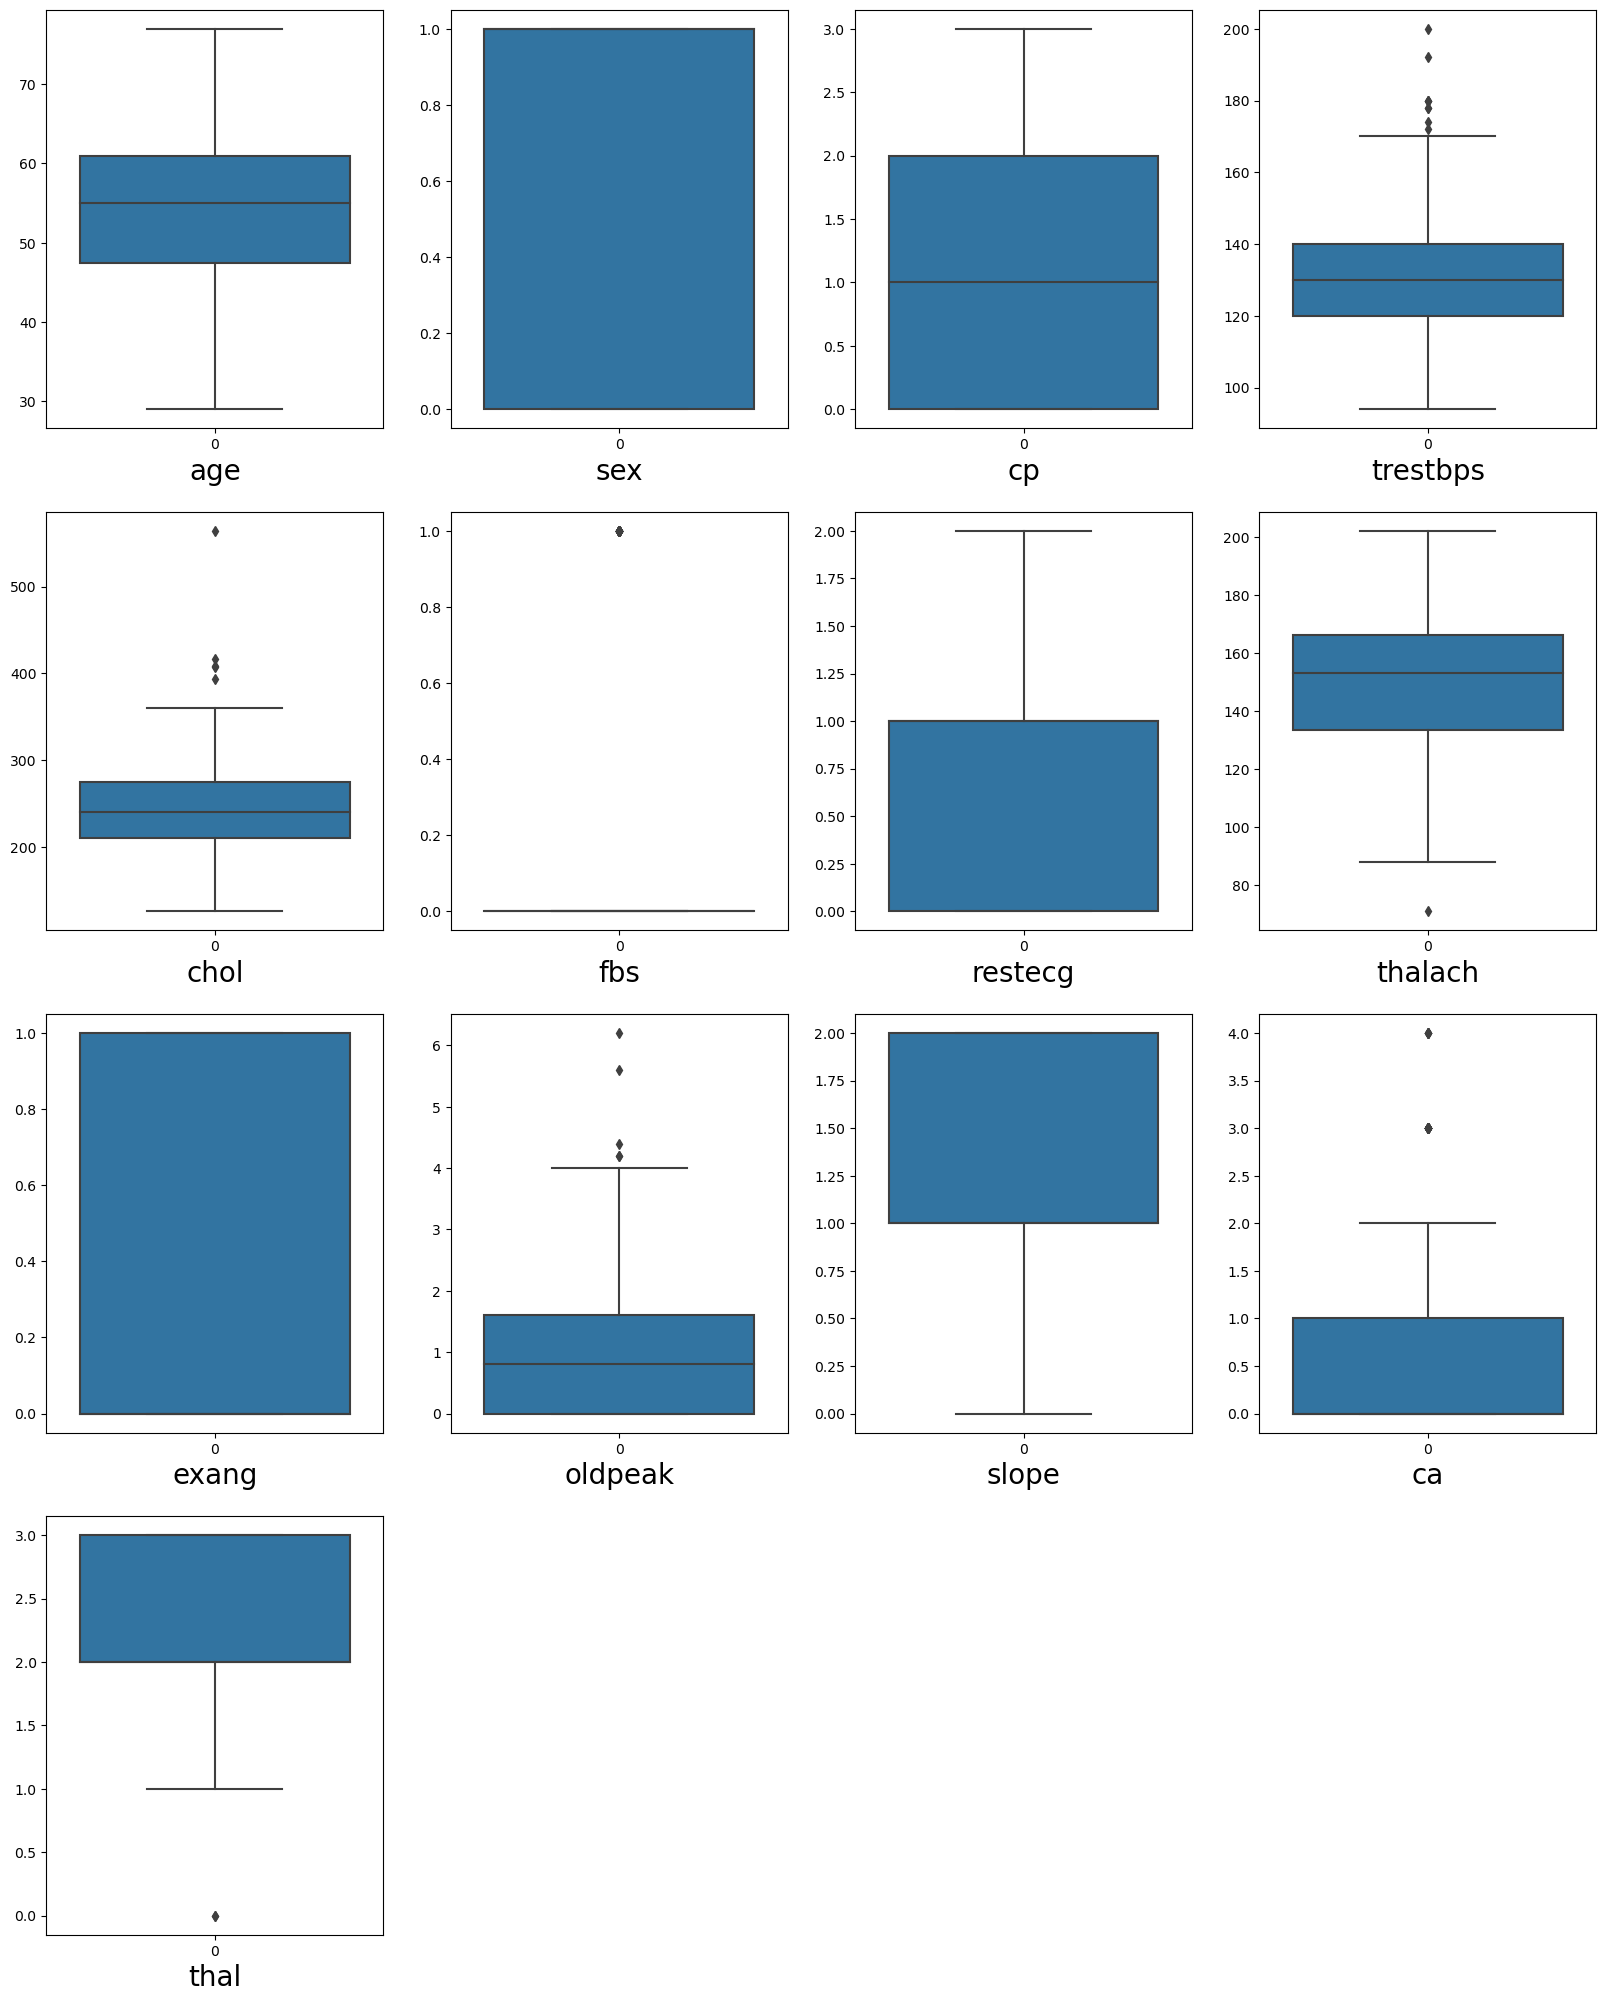

In [14]:
# Visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in df_features:
    if graph<=14 :
        ax = plt.subplot(4,4,graph)
        sns.boxplot(df_features[column])
        plt.xlabel(column, fontsize=20)
        
    graph+= 1   
plt.show()

In [17]:
data.shape

(303, 14)

In [15]:
# Find the IQR (inter quantile range) to identify outliers

# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

# IQR
iqr = q3 - q1

In [16]:
q1

age          47.5
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     133.5
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64

## Outlier detection formula


### higher side==> Q3 + (1.5*IQR)

### lower side==> Q1 - (1.5*IQR)

In [18]:
# validating one outlier
ttbps_high = (q3.trestbps + (1.5 * iqr.trestbps))
ttbps_high

170.0

In [19]:
# Check the indexes which have higer values
np_index = np.where(data['trestbps'] > ttbps_high)
np_index

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266], dtype=int64),)

In [21]:
# Drop the index which we found in the above cell
data = data.drop(data.index[np_index])
data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
281,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
282,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
283,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
ch_high = (q3.chol + (1.5 * iqr.chol))
print (ch_high)

index = np.where(data['chol'] > ch_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

369.75
(280, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
276,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
277,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
278,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
oldp_high = (q3.oldpeak + (1.5 * iqr.oldpeak))
print (oldp_high)

index = np.where(data['oldpeak'] > oldp_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

4.0
(276, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
272,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
273,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
274,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
ca_high = (q3.ca + (1.5 * iqr.ca))
print (ca_high)

index = np.where(data['ca'] > ca_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

2.5
(257, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
253,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
254,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
255,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


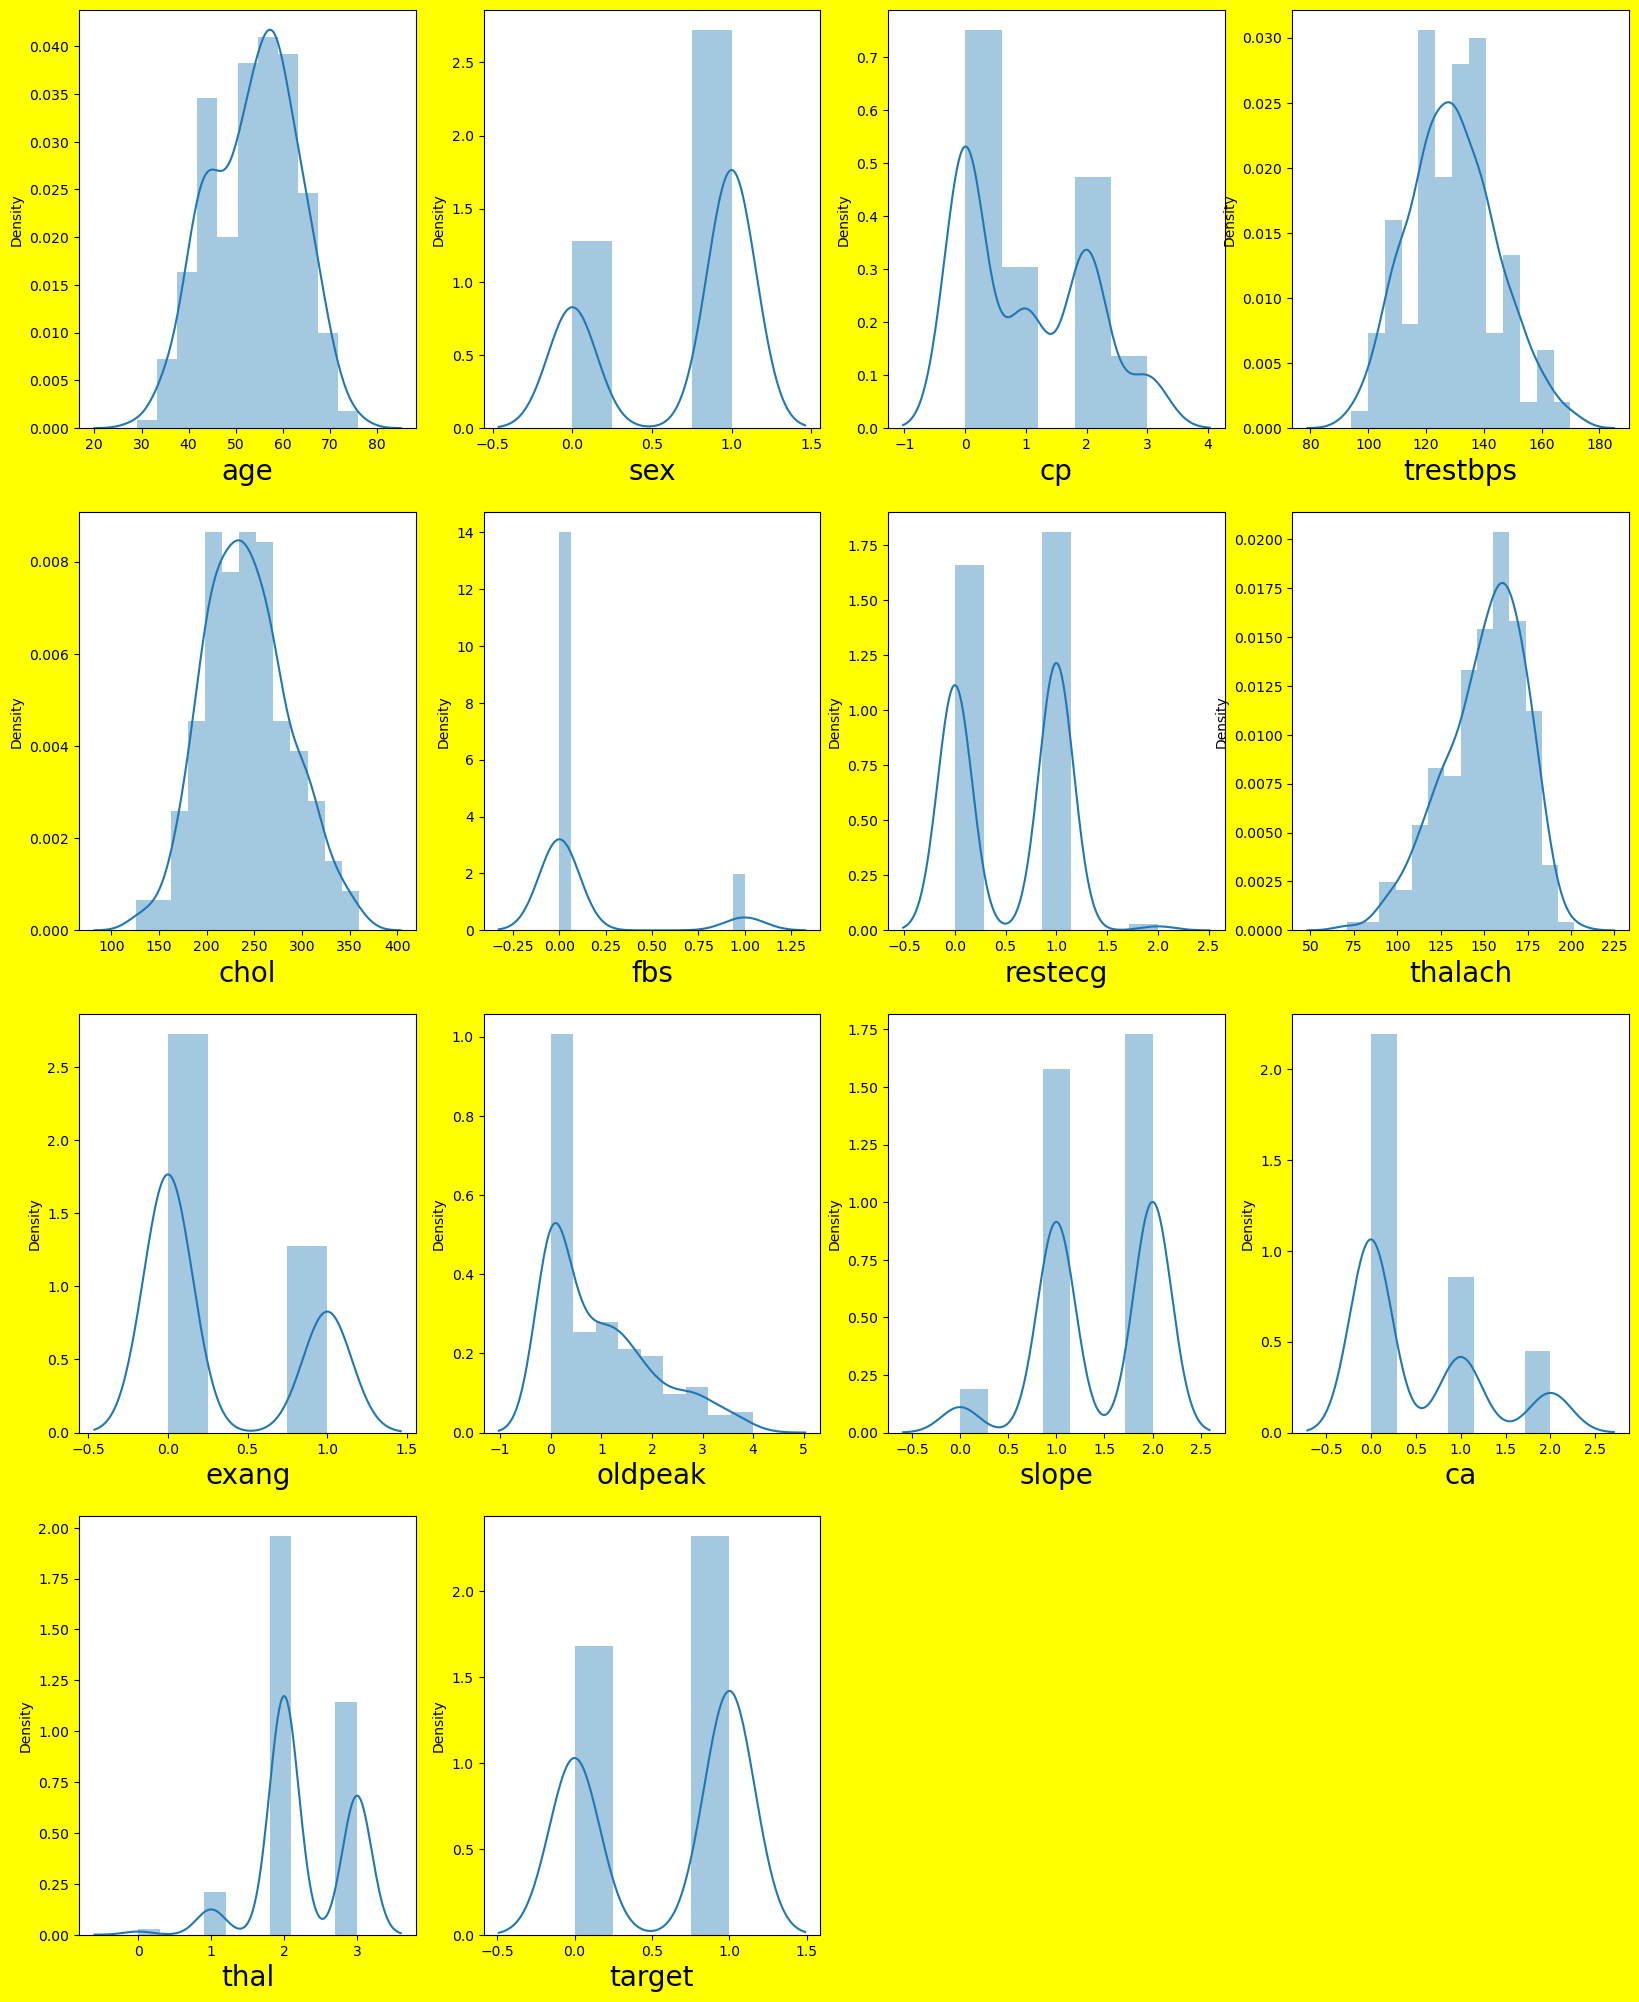

In [27]:
# Let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+= 1   
plt.show()

### Finding relationship. We want to keep only those features which have relationship with Label.

In [28]:
X = data.drop(columns = ['target'])
y = data['target']

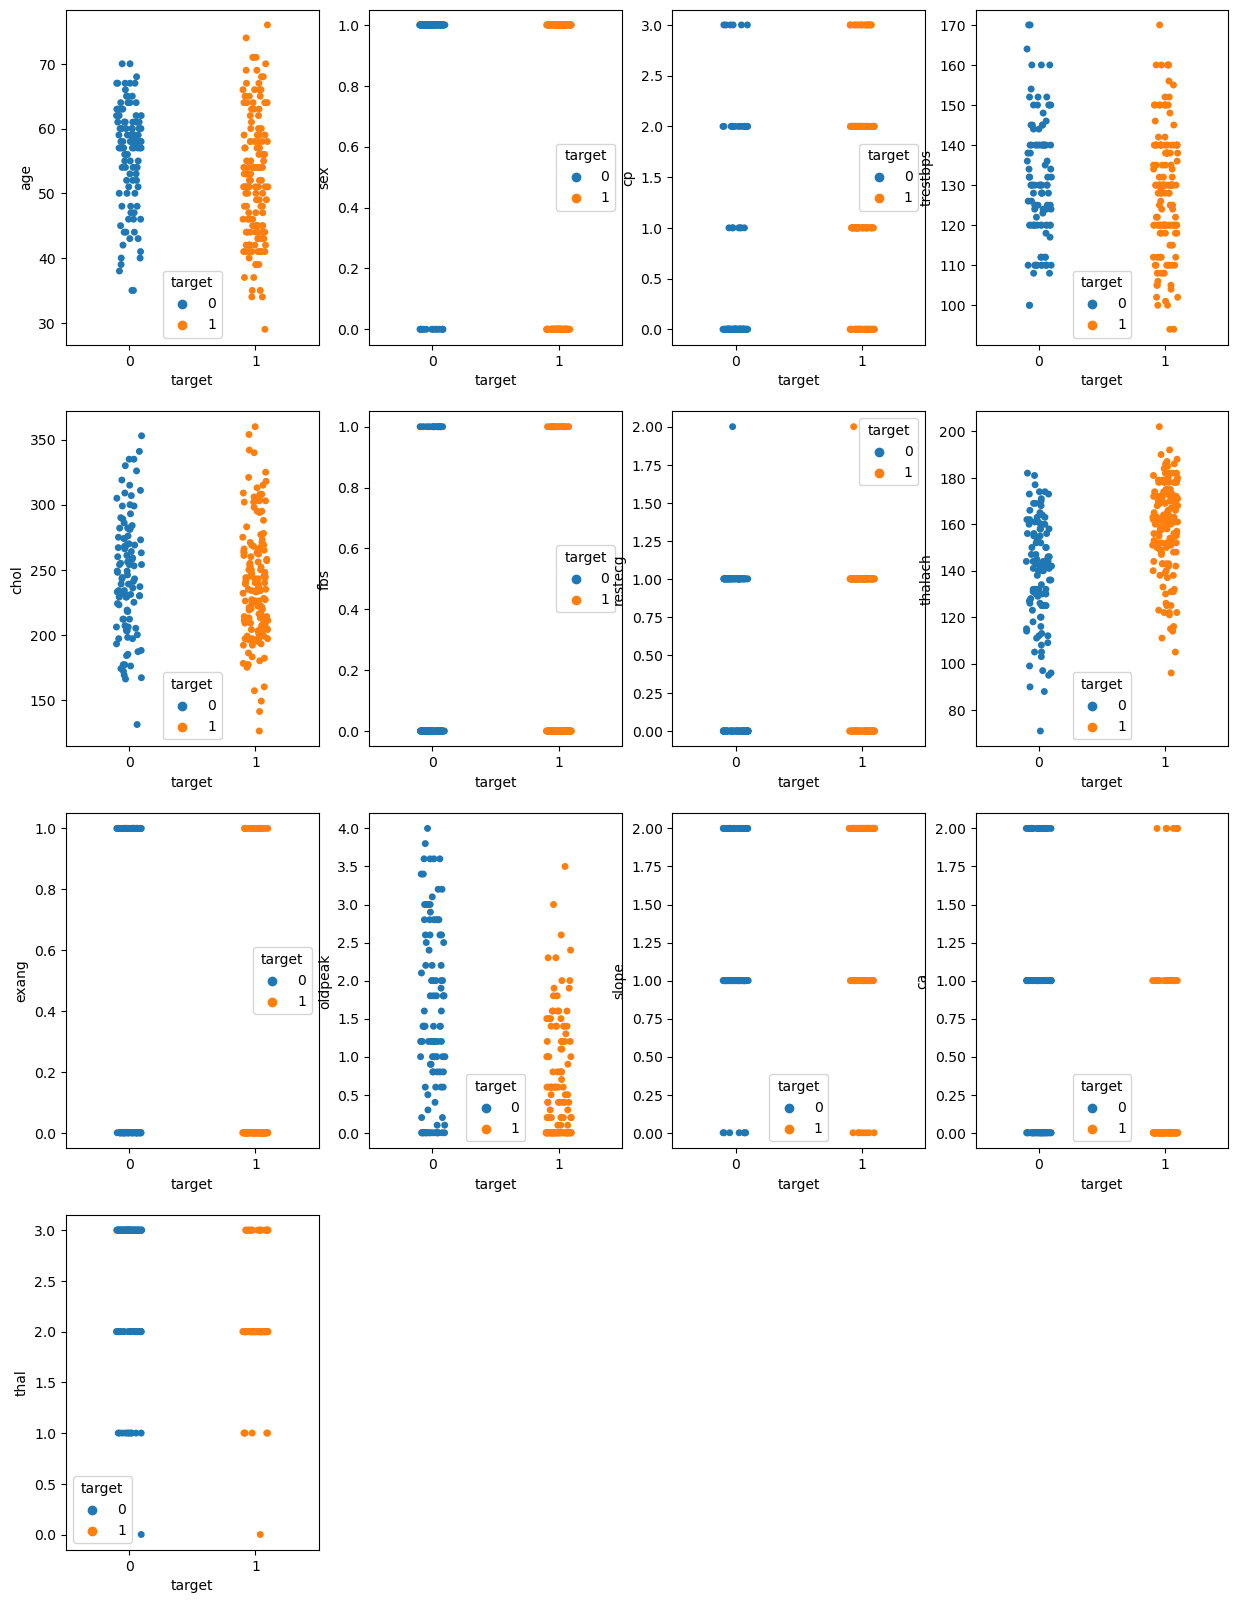

In [29]:
# let's see how features are related to class
plt.figure(figsize=(15,20))
plotnumber = 1

for column in X:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(x=y, y=X[column], hue=y)   
    plotnumber+= 1   
plt.show()

### Check multicollinearity problem. Find if one feature is dependent on another feature.

In [30]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [31]:
X_scaled.shape[1]

13

In [32]:
# Finding variance inflation factor in each scaled column i.e. X_scaled.shape[1]  (1/(1-R2))

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

# Let's check the values
vif

,vif,Features
0,1.530146,age
1,1.168749,sex
2,1.268753,cp
3,1.147515,trestbps
4,1.094483,chol
5,1.110956,fbs
6,1.064006,restecg
7,1.587725,thalach
8,1.454694,exang
9,1.707150,oldpeak


In [33]:
# train
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state=355)

## Model building

In [34]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = log_reg.predict(x_test)

In [36]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [37]:
log_reg.predict_proba(x_test)

array([[6.59016868e-01, 3.40983132e-01],
       [9.99085828e-01, 9.14171839e-04],
       [9.52630899e-01, 4.73691008e-02],
       [9.95506398e-01, 4.49360197e-03],
       [3.51606583e-01, 6.48393417e-01],
       [4.90128954e-01, 5.09871046e-01],
       [2.31208646e-01, 7.68791354e-01],
       [2.44424588e-02, 9.75557541e-01],
       [5.68155406e-02, 9.43184459e-01],
       [3.37935095e-01, 6.62064905e-01],
       [9.92705451e-01, 7.29454855e-03],
       [7.82539987e-01, 2.17460013e-01],
       [6.58363381e-02, 9.34163662e-01],
       [9.98494350e-01, 1.50565049e-03],
       [7.61317086e-02, 9.23868291e-01],
       [8.35927035e-01, 1.64072965e-01],
       [7.77318318e-02, 9.22268168e-01],
       [5.66018293e-01, 4.33981707e-01],
       [3.57375312e-01, 6.42624688e-01],
       [9.99154552e-01, 8.45447582e-04],
       [4.49860273e-01, 5.50139727e-01],
       [1.38152830e-01, 8.61847170e-01],
       [1.05480937e-01, 8.94519063e-01],
       [3.19776803e-02, 9.68022320e-01],
       [2.505345

In [38]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[19,  4],
       [ 8, 34]], dtype=int64)

In [39]:
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8153846153846154

In [40]:
from sklearn.metrics import classification_report

In [41]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        23
           1       0.89      0.81      0.85        42

    accuracy                           0.82        65
   macro avg       0.80      0.82      0.81        65
weighted avg       0.83      0.82      0.82        65



In [42]:
# ROC Curve
fpr,tpr, thresholds = roc_curve(y_test, y_pred)

In [43]:
# thresholds[0] means no instances predicted (It should be read from 0 - max)
print('Threshold =', thresholds)
print('True Positive Rate =', tpr)
print('False Positive Rate =', fpr)

Threshold = [inf  1.  0.]
True Positive Rate = [0.         0.80952381 1.        ]
False Positive Rate = [0.         0.17391304 1.        ]


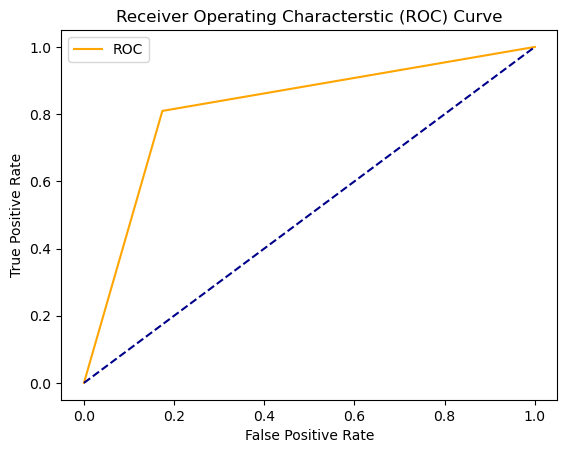

In [44]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) Curve')
plt.legend()
plt.show()